In [1]:
# Set up parameters to create data for estimation testing
seed <- 23
mu1 <- 0
mu2 <- 9
sd1 <- 1
sd2 <- 1
pi <- 0.7
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

In [2]:
# Results from the EM algorithm
em_call <- paste("python randomEM.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1EM <- as.numeric(results[1])
estPi1EM <- as.numeric(results[2])
estSd1EM <- as.numeric(results[3])
estMu2EM <- as.numeric(results[4])
estPi2EM <- as.numeric(results[5])
estSd1EM <- as.numeric(results[6])
results

[1] "0.0245676206795"    "0.69999999987"      "1.025890182020269" 
[4] "8.99154469928"      "0.30000000013"      "0.8896340907734963"

In [8]:
# Resuls from the PSO algorithm
pso_call <- paste("python callablePSO.py",params)
psoResults <- shell(pso_call,intern=TRUE)
results <- psoResults[1:(length(psoResults))]
estMu1PSO <- as.numeric(results[1])
estPi1PSO <- as.numeric(results[2])
estSd1PSO <- as.numeric(results[3])
estMu2PSO <- as.numeric(results[4])
estPi2PSO <- as.numeric(results[5])
estSd1PSO <- as.numeric(results[6])
results

[1] "0.654534062566" "0.565784107168" "1"              "10.05780759"   
[5] "0.434215892832" "1"

In [70]:
# Monte Carlo simulation
M <- 100

truMu1 <- numeric(M)
truPi1 <- numeric(M)
truSd1 <- numeric(M)
truMu2 <- numeric(M)
truPi2 <- numeric(M)
truSd2 <- numeric(M)

estMu1EM <- numeric(M)
estPi1EM <- numeric(M)
estSd1EM <- numeric(M)
estMu2EM <- numeric(M)
estPi2EM <- numeric(M)
estSd2EM <- numeric(M)

estMu1PSO <- numeric(M)
estPi1PSO <- numeric(M)
estSd1PSO <- numeric(M)
estMu2PSO <- numeric(M)
estPi2PSO <- numeric(M)
estSd2PSO <- numeric(M)

for(i in seq(1,M) ) {
    seed <- round(runif(n=1,min=1,max=100))
    mu1 <- round(runif(n=1,min=0,max=10),digits=2)
    mu2 <- round(runif(n=1,min=11,max=20),digits=2)
    sd1 <- round(runif(n=1,min=1,max=3),digits=2)
    sd2 <- sd1
    pi <- round(runif(n=1,min=0.61,max=0.89),digits=2)
    params <- paste(seed,mu1,mu2,sd1,sd2,pi)
   
    truMu1[i] <- mu1
    truMu2[i] <- mu2
    truPi1[i] <- pi 
    truPi2[i] <- 1 - pi
    truSd1[i] <- sd1
    truSd2[i] <- sd2

    em_call <- paste("python randomEM.py",params)
    emResults <- shell(em_call,intern=TRUE)
    results <- emResults[1:(length(emResults))]
    estMu1EM[i] <- as.numeric(results[1])
    estPi1EM[i] <- as.numeric(results[2])
    estSd1EM[i] <- as.numeric(results[3])
    estMu2EM[i] <- as.numeric(results[4])
    estPi2EM[i] <- as.numeric(results[5])
    estSd2EM[i] <- as.numeric(results[6])

    pso_call <- paste("python randomPSO.py",params)
    psoResults <- shell(pso_call,intern=TRUE)
    results <- psoResults[1:(length(psoResults))]
    estMu1PSO[i] <- as.numeric(results[1])
    estPi1PSO[i] <- as.numeric(results[2])
    estSd1PSO[i] <- as.numeric(results[3])
    estMu2PSO[i] <- as.numeric(results[4])
    estPi2PSO[i] <- as.numeric(results[5])
    estSd2PSO[i] <- as.numeric(results[6])
}

In [71]:
print("True Means")
truMu1
truMu2

print("True Pi")
truPi1
truPi2

print("EM Means")
estMu1EM
estMu2EM
print("EM pi")
estPi1EM
estPi2EM
print("PSO Means")
estMu1PSO
estMu2PSO
print("PSO pi")
estPi1PSO
estPi2PSO



[1] "True Means"


[1] 0.53 1.47 3.68 5.97 4.57 6.02 4.68 8.35 6.10 9.69 9.76 9.81 8.22 0.47 9.76
[16] 1.22 2.91 2.94 8.76 1.29 6.57 4.73 1.87 3.40 1.88 1.25 9.54 3.91 8.60 8.59

[1] 11.85 14.47 12.40 18.10 11.31 19.24 18.66 11.12 11.05 13.68 15.49 15.34
[13] 14.45 11.91 14.96 17.21 15.50 17.70 19.46 13.82 16.70 11.76 11.67 18.99
[25] 18.87 14.63 15.08 11.29 16.47 18.30

[1] "True Pi"


[1] 0.72 0.65 0.81 0.83 0.69 0.64 0.77 0.88 0.82 0.66 0.73 0.76 0.75 0.64 0.64
[16] 0.74 0.74 0.86 0.62 0.80 0.74 0.76 0.88 0.75 0.82 0.67 0.70 0.63 0.77 0.88

[1] 0.28 0.35 0.19 0.17 0.31 0.36 0.23 0.12 0.18 0.34 0.27 0.24 0.25 0.36 0.36
[16] 0.26 0.26 0.14 0.38 0.20 0.26 0.24 0.12 0.25 0.18 0.33 0.30 0.37 0.23 0.12

[1] "EM Means"


[1]  0.5543507  1.1564994  3.8711763  5.8686680  4.6465999  6.1608451
 [7]  4.5788421  8.0279089  6.2518466  0.8634601  9.2885563 10.0464921
[13]  8.0554077  0.6262198  9.8925821  1.2608013  2.6592614  3.1469099
[19]  8.9031832  1.3158295  6.3708361  4.7162655  1.9025737  3.5157090
[25]  1.9284840  1.2640723  8.3193744  3.6266990  8.7469854  8.6853648

[1] 11.97389 14.41953 12.87219 18.07497 11.46285 19.33013 18.85011 10.38576
 [9] 10.86965 11.29503 12.39423 15.33982 14.93783 11.93097 15.14945 17.25195
[17] 15.84055 18.55111 19.28881 13.75715 16.84876 11.72433 11.61960 18.86247
[25] 19.27836 14.62602 13.58807 10.99843 16.61256 18.10445

[1] "EM pi"


[1] 0.720000000 0.638468623 0.807381141 0.833718359 0.693641948 0.639998641
 [7] 0.770000000 0.603739467 0.824993913 0.008011966 0.301157866 0.769988341
[13] 0.770378247 0.640875266 0.667205873 0.740000000 0.739632196 0.865011345
[19] 0.619605149 0.800006046 0.734613561 0.765335915 0.880000000 0.750000001
[25] 0.820000213 0.670000000 0.404818340 0.557783712 0.775195511 0.878979656

[1] 0.2800000 0.3615314 0.1926189 0.1662816 0.3063581 0.3600014 0.2300000
 [8] 0.3962605 0.1750061 0.9919880 0.6988421 0.2300117 0.2296218 0.3591247
[15] 0.3327941 0.2600000 0.2603678 0.1349887 0.3803949 0.1999940 0.2653864
[22] 0.2346641 0.1200000 0.2500000 0.1799998 0.3300000 0.5951817 0.4422163
[29] 0.2248045 0.1210203

[1] "PSO Means"


[1] 11.9200604  3.4421997  3.9748342  6.2230213  5.5643518  7.6374650
 [7]  4.6741383  8.3722104  6.0708310 12.7094480  9.8145407 10.8070735
[13]  8.2933856  0.1247716 10.6881475 16.9905698  4.1426994  4.4708078
[19]  9.1719183  1.0708827  6.3455482  4.4339009  2.1901425  4.3285130
[25]  3.1744061 15.0453993 14.6371320 10.0786937  9.4522040  8.4874480

[1] -0.01476297 16.60156882 11.85384030 18.72339823 11.62440931 18.59112632
 [7] 19.34969071 11.43502093 11.33308146  7.53062079 17.36638294 17.43635676
[13] 15.81467068 14.53142973 16.64829156  0.54851438 15.58866874 22.21392460
[19] 21.43774713 14.96789948 20.64647744 12.82856763 12.87727531 19.61552552
[25] 21.96578091  0.72170446  9.24843089  4.25660806 17.19908611 16.06163369

[1] "PSO pi"


[1] 0.7044114 0.7037508 0.9782980 0.7037508 0.7037508 0.7037508 0.5657841
 [8] 0.7665413 0.7037508 0.6089498 0.8092106 0.7037508 0.7037508 0.5657841
[15] 0.7037508 0.7044114 0.7037508 0.7696256 0.5657841 0.5657841 0.5657841
[22] 0.5657841 0.9493006 0.5657841 0.5657841 0.7044114 0.5843104 0.5843104
[29] 0.7037508 0.9782980

[1] 0.29558865 0.29624916 0.02170204 0.29624916 0.29624916 0.29624916
 [7] 0.43421589 0.23345870 0.29624916 0.39105022 0.19078938 0.29624916
[13] 0.29624916 0.43421589 0.29624916 0.29558865 0.29624916 0.23037443
[19] 0.43421589 0.43421589 0.43421589 0.43421589 0.05069941 0.43421589
[25] 0.43421589 0.29558865 0.41568956 0.41568956 0.29624916 0.02170204

In [69]:
truSd1
truSd2

[1] 1.90 1.20 1.99 1.76 2.31 1.23 1.16 1.52 1.16 2.19

[1] 1.90 1.20 1.99 1.76 2.31 1.23 1.16 1.52 1.16 2.19

In [72]:
print("EM")
mean(abs(truMu1 - estMu1EM))
mean(abs(truPi1 - estPi1EM))
# mean(abs(truSd1 - estSd1EM))
mean(abs(truMu2 - estMu2EM))
mean(abs(truPi2 - estPi2EM))
# mean(abs(truSd2 - estSd2EM))

print("PSO")
mean(abs(truMu1 - estMu1PSO ))
mean(abs(truPi1 - estPi1PSO ))
# mean(abs(truSd1 - estSd1PSO ))
mean(abs(truMu2 - estMu2PSO ))
mean(abs(truPi2 - estPi2PSO ))
# mean(abs(truSd2 - estSd2PSO ))

[1] "EM"


[1] 0.4749416

[1] 0.06107202

[1] 0.4187463

[1] 0.06107202

[1] "PSO"


[1] 2.34139

[1] 0.09777279

[1] 3.242918

[1] 0.09777279

In [91]:
sum(t < 65) / 272

[1] 0.3455882

In [55]:

rmixture <- function(n,mu1, mu2, sd1, sd2, pi) {
    #set.seed(100)
    u <- runif(n)
    r <- numeric(n)
    
    for(i in seq(1,n)) {
        if(u[i] <= pi) {
            r[i] = rnorm(1, mean = mu1, sd = sd1)
        } else {
            r[i] = rnorm(1, mean = mu2, sd = sd2)
        }
    }

    return(r)
}






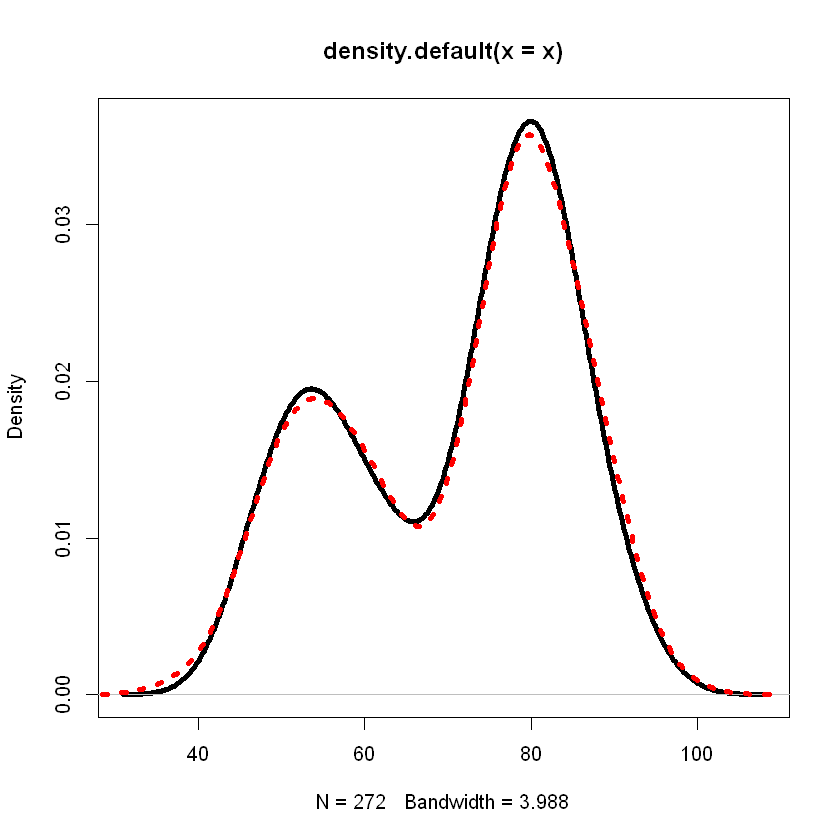

In [61]:
seed <- 23
mu1 <- 0
mu2 <- 0
sd1 <- 1
sd2 <- 1
pi <- 0.7
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

x <- faithful[,2]
write.csv(x, "waittime.csv", row.names = FALSE)
d = density(x)
plot(d,lwd=4)

em_call <- paste("python faithfulEM.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1EM <- as.numeric(results[1])
estPi1EM <- as.numeric(results[2])
estSd1EM <- as.numeric(results[3])
estMu2EM <- as.numeric(results[4])
estPi2EM <- as.numeric(results[5])
estSd2EM <- as.numeric(results[6])

d = density(rmixture(272,estMu1EM,estMu2EM,estSd1EM,estSd2EM,estPi1EM )  )
lines(d,col=2,lwd=4,lty=3)


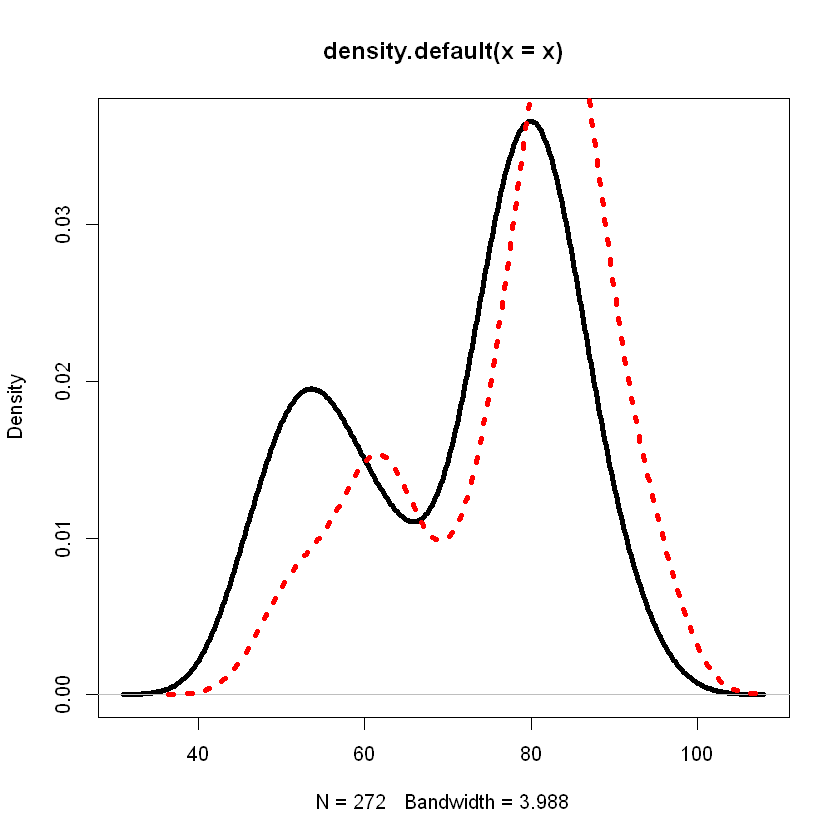

In [64]:
seed <- 23
mu1 <- 0
mu2 <- 0
sd1 <- estSd1EM
sd2 <- estSd2EM
pi <- estPi1EM
params <- paste(seed,mu1,mu2,sd1,sd2,pi)

# True density of olf faithful
x <- faithful[,2]
write.csv(x, "waittime.csv", row.names = FALSE)
d = density(x)
plot(d,lwd=4)

# Plot multiple densities generated from PSO

em_call <- paste("python faithfulPSO.py",params)
emResults <- shell(em_call,intern=TRUE)
results <- emResults[1:(length(emResults))]
estMu1PSO <- as.numeric(results[1])
estPi1PSO <- as.numeric(results[2])
estSd1PSO <- as.numeric(results[3])
estMu2PSO <- as.numeric(results[4])
estPi2PSO <- as.numeric(results[5])
estSd2PSO <- as.numeric(results[6])

d = density(rmixture(272,estMu1PSO,estMu2PSO,estSd1EM,estSd2EM,estPi1PSO )  )
lines(d,col=2,lty=3,lwd=4)   
